## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.Datasets used in this project can be found [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/December/5a32c9db_analyzeabtestresults-2/analyzeabtestresults-2.zip)<br>
**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).


<a id='probability'></a>
### Part I - Probability

To get started, let's import our libraries.

In [83]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [84]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [85]:
print('No. of rows in Dataset:',df.shape[0])

No. of rows in Dataset: 294478


c. The number of unique users in the dataset.

In [86]:
print('No. of unique users in Dataset:',df.user_id.nunique())

No. of unique users in Dataset: 290584


d. The proportion of users converted.

In [87]:
print('Proportion of converted users:',format(100*df.converted.mean(),'.3f'),'%')

Proportion of converted users: 11.966 %


e. The number of times the `new_page` and `treatment` don't line up.

In [88]:
df.query("(group == 'treatment' and landing_page == 'old_page') or (group == 'control' and landing_page == 'new_page')" ).shape[0]

3893

f. Do any of the rows have missing values?

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are no rows with missing values (NaNs).

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [90]:
idx = df.index[((df['group'] == 'treatment') & (df['landing_page'] == 'old_page')) | ((df['group'] == 'control') & (df['landing_page'] == 'new_page'))]
idx ## Store the index of the mismatched rows

Int64Index([    22,    240,    308,    327,    357,    490,    685,    713,
               776,    846,
            ...
            293817, 293888, 293894, 293917, 293996, 294014, 294200, 294252,
            294253, 294331],
           dtype='int64', length=3893)

In [91]:
df2 = df.drop(idx)

In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [93]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [94]:
print('No. of unique user_ids in df2 Dataset:',df2['user_id'].nunique())

No. of unique user_ids in df2 Dataset: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [95]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

>The index number for this duplicate *user_id* is **2893**, with:
* **user_ID**: 773192
* **group**: treatment
* **landing_page**: new_page

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [96]:
df2 = df2.drop_duplicates(['user_id'], keep = 'first')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [97]:
print('Probability of an individual converting:',df2['converted'].mean())

Probability of an individual converting: 0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [98]:
df2.groupby(['group'])['converted'].mean()

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

>Probability of an individual converting while being in the *control* group =  **0.1203**

c. Given that an individual was in the `treatment` group, what is the probability they converted?

>Probability of an individual converting while being in the *treatment* group =  **0.1188**

d. What is the probability that an individual received the new page?

In [99]:
print('Probability that an individual received the new page:',(df2['landing_page'] == 'new_page').mean())

Probability that an individual received the new page: 0.500061944223


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

>Given the probability values of **0.1188** (probability of an individual converting while in the treatment group) and **0.500** (probability that an individual received the new page) we have evidence that the new treatment page does not lead to more conversions. There is at best a 50% chance the new treatment will lead to conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The NULL and Alternative Hypothesis can be framed as follows:
$$ H_0: p_{new} \leq p_{old} $$
$$ H_1: p_{new} > p_{old} $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [100]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [101]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [102]:
n_new = df2[df2['group']== 'treatment'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [103]:
n_old = df2[df2['group']== 'control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [104]:
new_page_converted = np.random.binomial(n_new,p_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [105]:
old_page_converted = np.random.binomial(n_old,p_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [106]:
(new_page_converted/n_new) - (old_page_converted/n_old)

0.0007411334064812286

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [107]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old,p_old)
    diffs = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  2.20000000e+01,   1.77000000e+02,   8.92000000e+02,
          2.33000000e+03,   3.28900000e+03,   2.32000000e+03,
          8.09000000e+02,   1.47000000e+02,   1.30000000e+01,
          1.00000000e+00]),
 array([-0.0045242 , -0.00350969, -0.00249517, -0.00148066, -0.00046614,
         0.00054837,  0.00156289,  0.0025774 ,  0.00359192,  0.00460643,
         0.00562095]),
 <a list of 10 Patch objects>)

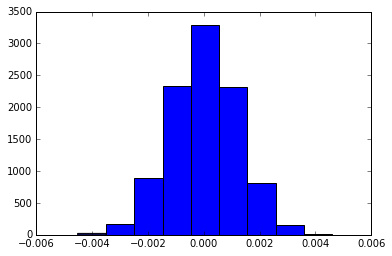

In [108]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [109]:
act_diff = df2[df2['group'] == 'treatment']['converted'].mean() - df2[df2['group'] == 'control']['converted'].mean()
(act_diff < p_diffs).mean()

0.9042

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>**This is a *p* value.** A *p* value is the probability of observing our statistic, or one more extreme in favor of the alternative if the null hypothesis is actually true. Given that our *p* value is so large, this suggests that observing the data from the NULL is likely. We therefore, would fail to reject the NULL ($H_0$) in favor of an alternative ($H_1$) that suggests that conversion rate of the new page is higher than the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [110]:
import statsmodels.api as sm
convert_old = df2[(df2["landing_page"] == "old_page") & (df2["converted"] == 1)]["user_id"].count()
convert_new = df2[(df2["landing_page"] == "new_page") & (df2["converted"] == 1)]["user_id"].count()
n_old = df2[df2['landing_page']== 'old_page'].shape[0]
n_new = df2[df2['landing_page']== 'new_page'].shape[0]

In [111]:
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [112]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
print('z-Score:',z_score,'\np-Value:', p_value)

z-Score: -1.31092419842 
p-Value: 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [113]:
from scipy.stats import norm
norm.cdf(z_score) # Tells us how significant our z-score is

0.094941687240975514

In [114]:
norm.ppf(1-(0.05/2)) # Tells us what our critical value at 95% confidence is

1.959963984540054

>The p-value of **0.905** from the *sm.stats.proportions_ztest* matches with the p-value we computed manually in 2j.<br><br>
The Z Score is a test of statistical significance that helps us to decide whether or not we can reject the NULL ($H_0$) Hypothesis. Since the z-score of -1.3109 does not exceed the critical value of 1.9599, we fail to reject the NULL ($H_0$) Hypothesis.<br><br>
In A/B testing we are testing whether the new page leads to  higher convert rate, However, if we are testing whether the new page is *better* or *worse* we should do two two-tailed tests, but since we only care whether the new page is *better* or not than the old page, here we do a One- tailed test

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>*We will do Logistic Regression because of the binary values (True or False) of the **converted** column.*

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [115]:
df2['intercept'] = 1
df2[['intercept','ab_page']]= pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [116]:
import statsmodels.api as sm
logit = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [117]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Dec 2017   Pseudo R-squ.:               8.077e-06
Time:                        08:14:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -2.0038      0.008   -247.146      0.000      -2.020      -1.988
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

>The p-value associated with **ab_page** is **0.000** which suggests that there is not much difference in conversion rate between the newly treated page and old page, i.e both *new_page* and *old_page* are equally statistically significant with regards to converting users.
$$ H_0: p_{new} = p_{old} $$
$$ H_1: p_{new} \neq p_{old} $$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>_Doing multiple linear regression adding more than one predictor variable (quantitative or categorical) to predict a response variable is a good way to check if the outcome is influenced by more than one variable. Here we can consider adding **timestamps** (a categorical variable) to see if the timestamp has any influence on the conversion rate._
<br><br>
**Disadvantages or problems encountered in Multiple Linear Regression:**<br>
 We may not get our model to converge because of inherenet problems in Linear Mixed Effect Models such as:
* Non-linearity of the response-predictor relationships
* Correlation of error terms
* Non-constant Variance and Normally Distributed Errors
* Outliers/ High leverage points
* Collinearity

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [118]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1


In [119]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [120]:
### Create the necessary dummy variables
df_new[['CA','US']] = pd.get_dummies(df_new['country'])[["CA","US"]]

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [121]:
### Fit Your Linear Model And Obtain the Results
logit = sm.Logit(df_new['converted'],df_new[['intercept','US','CA']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.424702
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 23 Dec 2017   Pseudo R-squ.:                 -0.1600
Time:                        08:14:52   Log-Likelihood:            -1.2341e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9887      0.009   -108.449      0.000      -1.007      -0.971
US            -1.5944      0.007   -212.822      0.000      -1.609      -1.580
CA            -1.6391      0.026    -61.973      0.000      -1.691      -1.587
==============================================================================
"""

In [122]:
np.exp(results.params)

intercept    0.372070
US           0.203032
CA           0.194155
dtype: float64

In [123]:
1/np.exp(results.params)

intercept    2.687665
US           4.925336
CA           5.150522
dtype: float64

<a id='conclusions'></a>
### Conclusions



Though the users from the USA have a marginally higher conversion rate, this is not necessarily practically significant for us to make realistic conclusions. Of course in this dataset there are more users from USA compared to UK or Canada.